# IDS Assignment - Predictive Analytics: Predicting Used Car Prices

#### Author: Subimal Chakraborty [Group 15 ]

In [78]:
#importing libraries for data handling
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#importing required packages for

#1 for preprocessing 
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder

#2 for modelling algorithm 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
#import xgboost as xgb

#3 Model building
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

In [79]:
df_data=pd.read_csv("car data.csv")
df_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [80]:
#displaying number of rows and column 
df_data.shape

(301, 9)

In [81]:
##check missing values
df_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [82]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [83]:
#Unique categories
print(df_data['Seller_Type'].unique())
print(df_data['Fuel_Type'].unique())
print(df_data['Transmission'].unique())
print(df_data['Owner'].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
[0 1 3]


In [84]:
df_data.groupby(['Car_Name']).count()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Car_Name,,,,,,,,
800,1,1,1,1,1,1,1,1
Activa 3g,2,2,2,2,2,2,2,2
Activa 4g,1,1,1,1,1,1,1,1
Bajaj ct 100,1,1,1,1,1,1,1,1
Bajaj Avenger 150,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
sx4,6,6,6,6,6,6,6,6
verna,14,14,14,14,14,14,14,14
vitara brezza,1,1,1,1,1,1,1,1


In [85]:
df_data.groupby(['Year']).count()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Year,,,,,,,,
2003,2,2,2,2,2,2,2,2
2004,1,1,1,1,1,1,1,1
2005,4,4,4,4,4,4,4,4
2006,4,4,4,4,4,4,4,4
2007,2,2,2,2,2,2,2,2
2008,7,7,7,7,7,7,7,7
2009,6,6,6,6,6,6,6,6
2010,15,15,15,15,15,15,15,15
2011,19,19,19,19,19,19,19,19


In [86]:
# Describe categorical features
df_data.describe(include=['O'])

,Car_Name,Fuel_Type,Seller_Type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


In [87]:
# returns statistical details for all numeric values
df_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [88]:
# sorting important features for further model processing
final_dataset=df_data[['Year','Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']]

In [89]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [90]:
# initializing the current year as 2022
final_dataset['Current Year']=2022

In [91]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022


In [92]:
final_dataset['age_car']=final_dataset['Current Year']- final_dataset['Year']
# we calculate the difference - to learn about the age of the car

In [93]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year,age_car
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022,8


In [94]:
# since we know the difference in terms of year we don't actually need the year feature
final_dataset.drop(['Year'],axis=1,inplace=True)

In [95]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year,age_car
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022,8


In [96]:
# Convert categorical variable into dummy/indicator variables
final_dataset=pd.get_dummies(final_dataset,drop_first=True)

In [97]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Current Year,age_car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,2022,8,0,1,0,1
1,4.75,9.54,43000,0,2022,9,1,0,0,1
2,7.25,9.85,6900,0,2022,5,0,1,0,1
3,2.85,4.15,5200,0,2022,11,0,1,0,1
4,4.60,6.87,42450,0,2022,8,1,0,0,1


In [98]:
#we know the age of the vehicle so we don't need the current year as well
final_dataset=final_dataset.drop(['Current Year'],axis=1)

In [99]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,age_car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


In [100]:
#Compute pairwise correlation of columns, excluding NA/null values.
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,age_car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
age_car,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


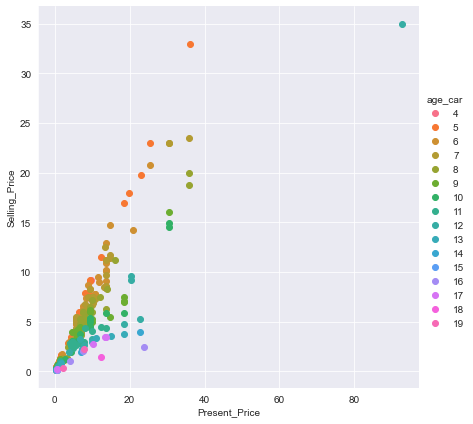

In [101]:
sns.set_style("darkgrid")
sns.FacetGrid(final_dataset,hue="age_car",height=6).map(plt.scatter,"Present_Price","Selling_Price").add_legend()
plt.show()

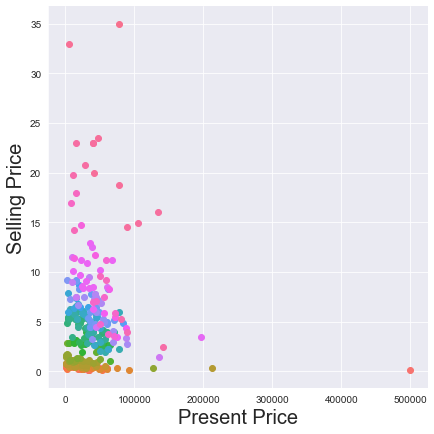

In [102]:
sns.set_style("darkgrid")
sns.FacetGrid(final_dataset,hue="Present_Price",height=6).map(plt.scatter,"Kms_Driven","Selling_Price")
plt.xlabel("Present Price",fontsize=20)
plt.ylabel("Selling Price",fontsize=20)
plt.show()

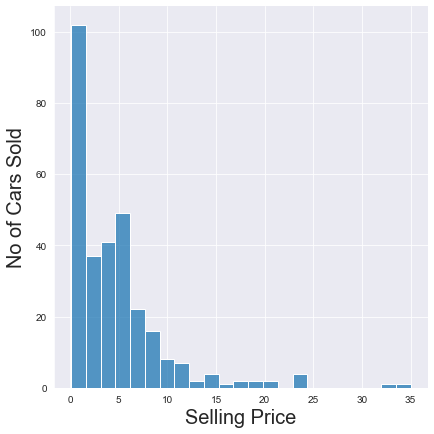

In [103]:
sns.set_style("darkgrid")
sns.FacetGrid(final_dataset,height=6).map(sns.histplot,"Selling_Price")
plt.xlabel("Selling Price", fontsize=20)
plt.ylabel("No of Cars Sold", fontsize=20)
plt.show()

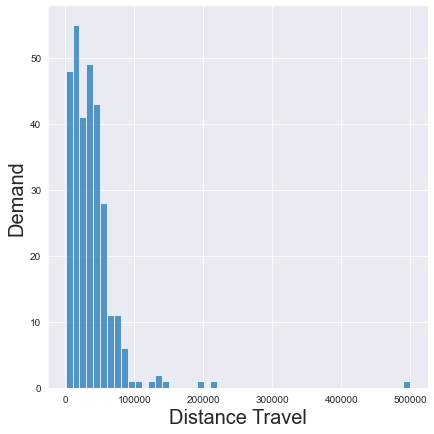

In [104]:
sns.set_style("darkgrid")
sns.FacetGrid(final_dataset,height=6).map(sns.histplot,"Kms_Driven")
plt.xlabel("Distance Travel",fontsize=20)
plt.ylabel("Demand",fontsize=20)
plt.show()

In [105]:
#plot 2d charts 
import seaborn as sns

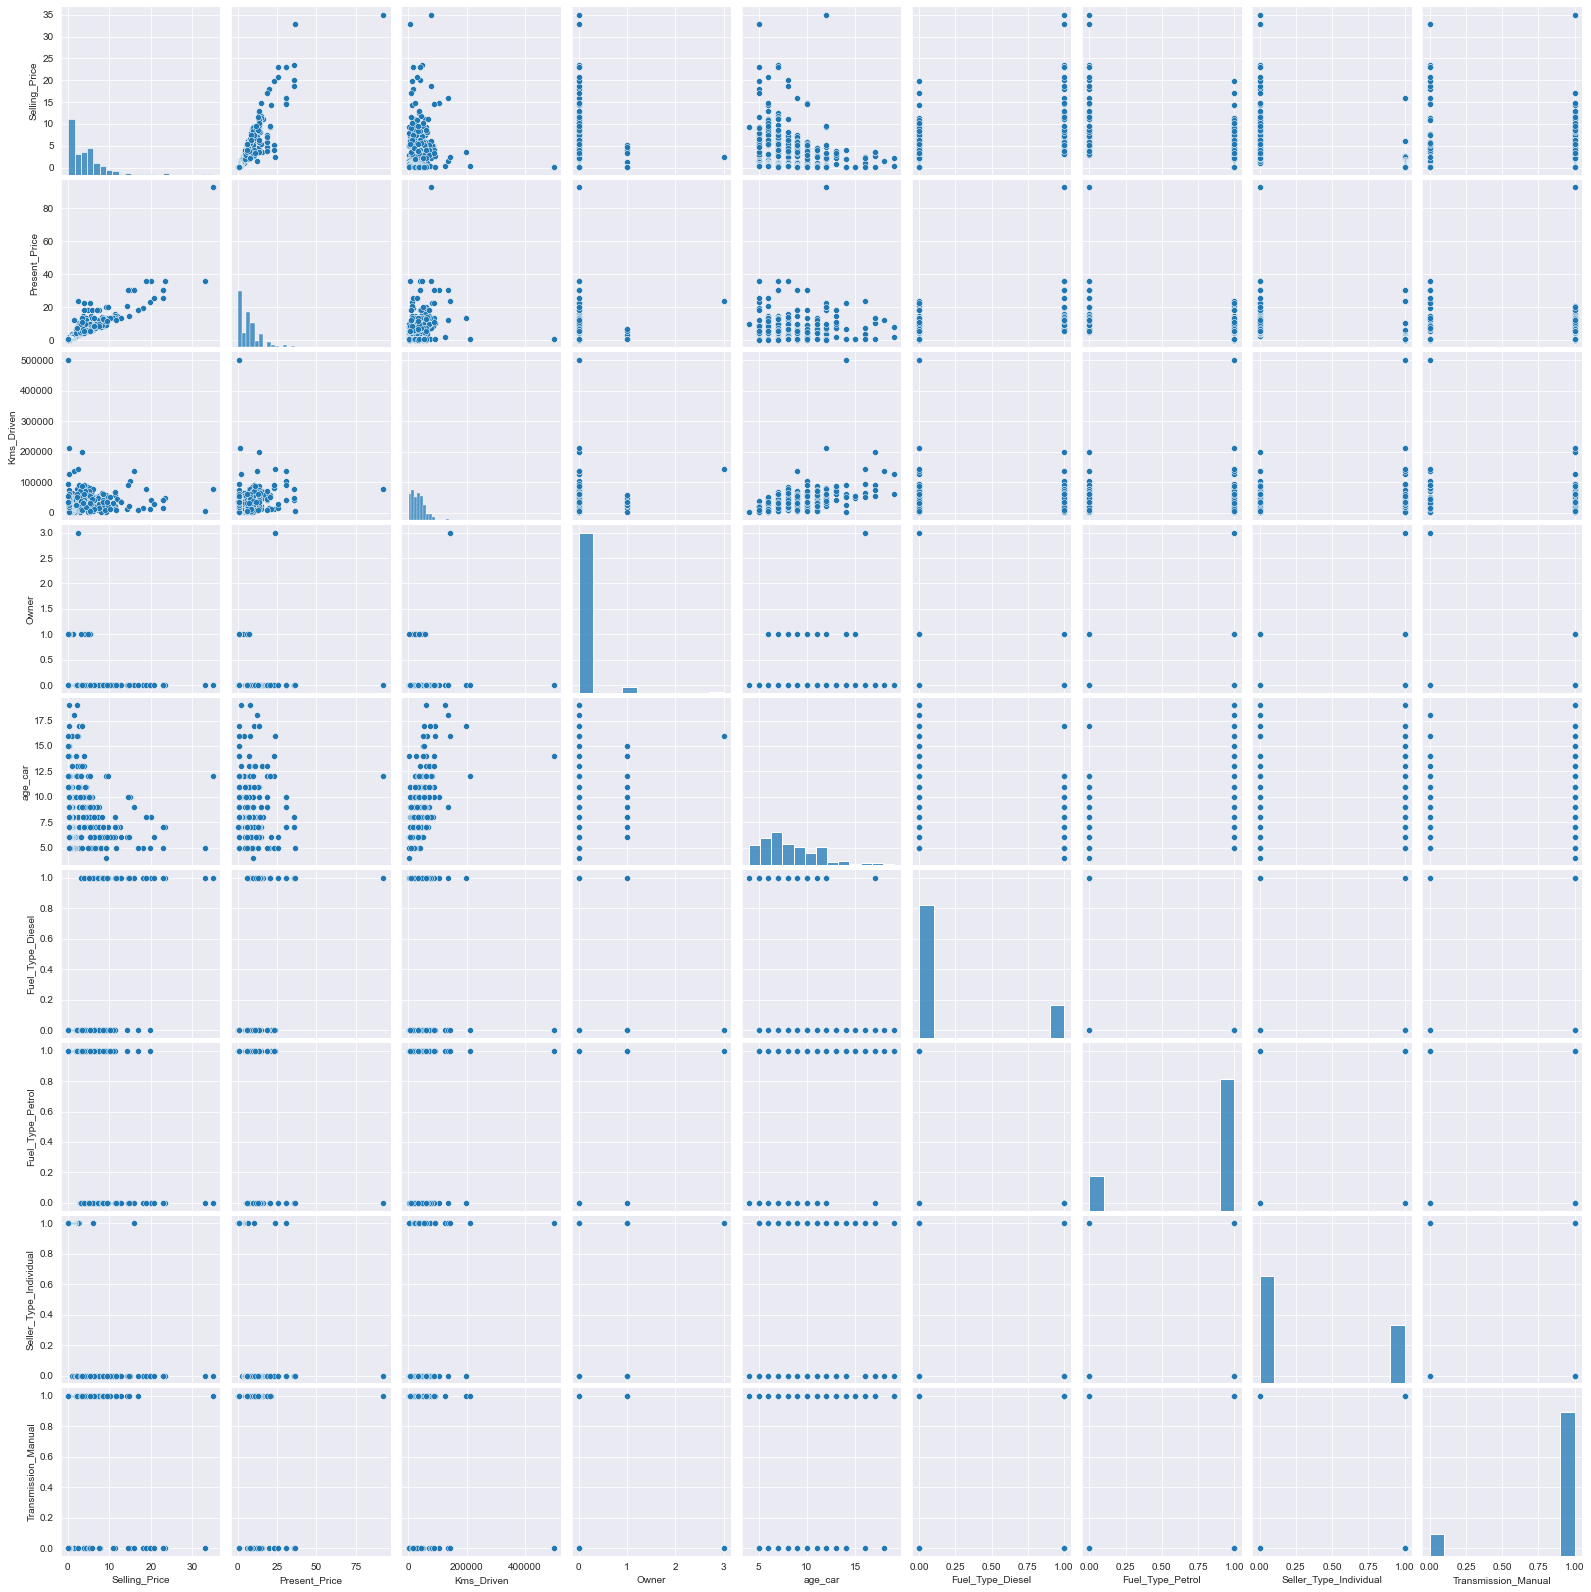

In [106]:
sns.pairplot(final_dataset)

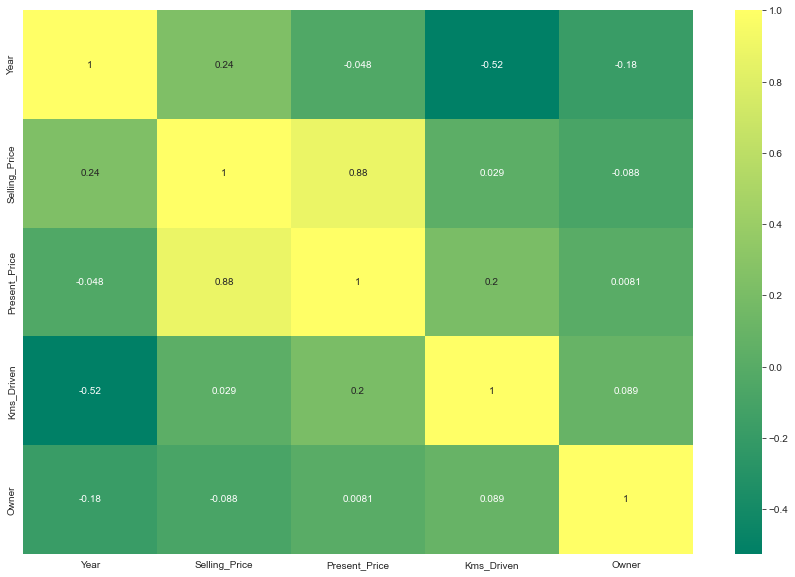

In [107]:
# correlation matrix
import seaborn as sns
#get correlations of each features in dataset
corrmat = df_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,10))
#plot heat map
g=sns.heatmap(df_data[top_corr_features].corr(),annot=True,cmap="summer")

In [108]:
X=final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]

In [109]:
X['Owner'].unique()

array([0, 1, 3], dtype=int64)

In [110]:
X.head()

,Present_Price,Kms_Driven,Owner,age_car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,8,0,1,0,1
1,9.54,43000,0,9,1,0,0,1
2,9.85,6900,0,5,0,1,0,1
3,4.15,5200,0,11,0,1,0,1
4,6.87,42450,0,8,1,0,0,1


In [111]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [112]:
### Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [113]:
print(model.feature_importances_)

[0.37273281 0.03890597 0.00080402 0.078003   0.23327769 0.01090895
 0.12400502 0.14136255]


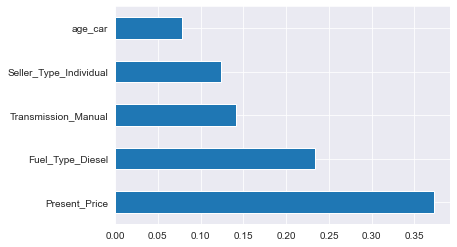

In [114]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [128]:
##Standardize X Values

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

# We fit_transform train data because we don't want our model to be influenced in any way by the test data. 
# The test data acts as unseen, brand new data to test the quality of the model.
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# We only transform the test data so that we can conform it to the parameters set with the mean from the training data

In [129]:
## Linear Regression Model - simple Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
#create a model instance
lr_model = LinearRegression()
#fit the model on the training data
lr_model.fit(X_train, y_train)
# get cross validated scores
scores = cross_val_score(lr_model, X_train, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())

#training score
print("Training Score:", lr_model.score(X_train, y_train))
# evaluate the data on the test set
print("Test Score:", lr_model.score(X_test, y_test))

Cross-validated training scores: [0.92616103 0.891257   0.8266749  0.82464389 0.72578121]
Mean cross-validated training score: 0.8389036052088527
Training Score: 0.883848260396078
Test Score: 0.8578217470613557


Text(0, 0.5, 'Feature')

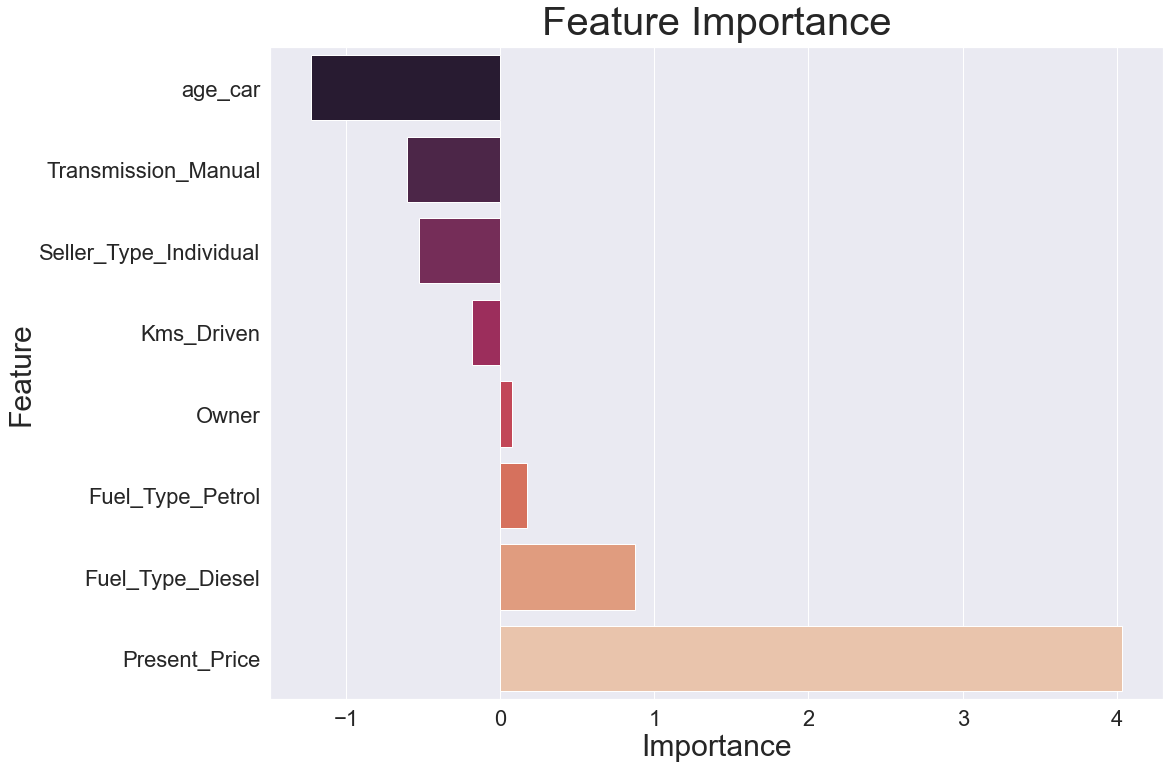

In [168]:
## Looking at the Linear Regression Model based on Feature Importance

fi = pd.DataFrame({
    'feature': X_train.columns,
    'importance': lr_model.coef_
})
fi.sort_values('importance', ascending=True, inplace=True)
#sns.set_style('ticks')
sns.set(font_scale = 2)
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(16, 12)
sns.barplot(x='importance', y='feature', data=fi[-15:], orient='h', palette = 'rocket', saturation=0.7)  
ax.set_title("Feature Importance", fontsize=40, y=1.01)
ax.set_xlabel('Importance', fontsize = 30)
ax.set_ylabel('Feature', fontsize = 30)

In [170]:
## Looking at the Linear Regression Model based on Predictions & Residuals
# looking at what the model predicted compared to what the actual value was

predictions = lr_model.predict(X_test)
residuals_df = pd.DataFrame(predictions, y_test)
residuals_df.reset_index(inplace = True)
residuals_df.head()
residuals_df.rename({'Selling_Price': 'actuals', 0: 'predictions'}, axis = 1, inplace = True)
residuals_df['residuals'] = residuals_df.actuals - residuals_df.predictions
residuals_df

,actuals,predictions,residuals
0,7.40,7.736932,-0.336932
1,4.00,2.917617,1.082383
2,0.50,-0.591131,1.091131
3,3.15,4.166512,-1.016512
4,1.25,0.509900,0.740100
...,...,...,...
86,2.70,2.107705,0.592295
87,0.60,1.493431,-0.893431
88,0.75,1.495806,-0.745806
89,7.90,6.254636,1.645364


Text(0, 0.5, 'Actual')

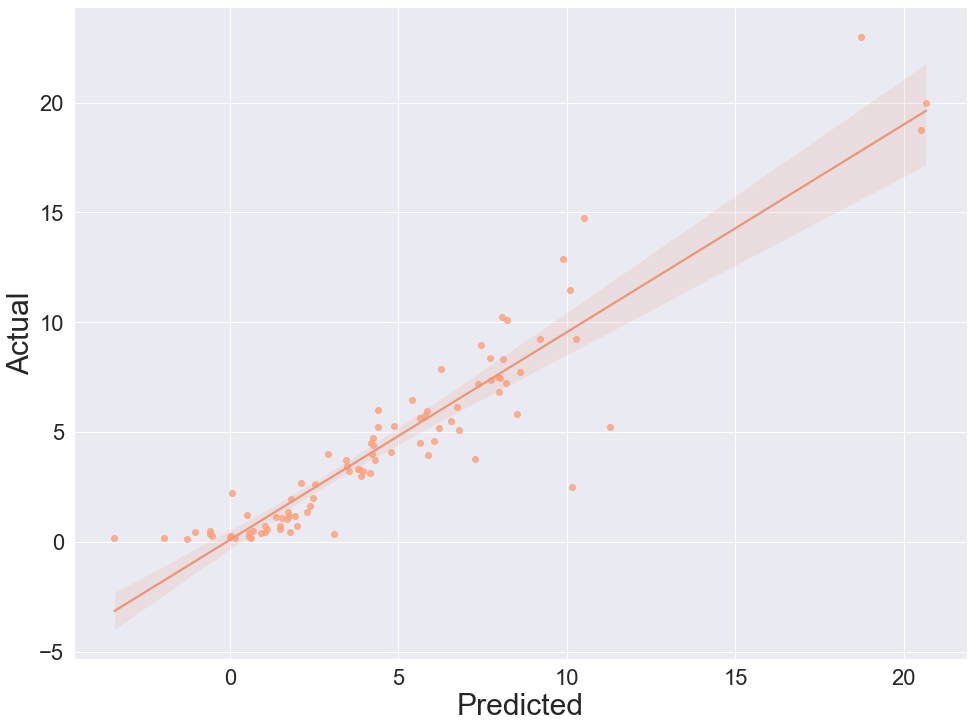

In [171]:
#predicted y values
predictions = lr_model.predict(X_test)
#residuals (or error between predictions and actual)
residuals = y_test - predictions
sns.axes_style(style='white')
sns.set(font_scale = 2)
fig, ax = plt.subplots()
fig.set_size_inches(16, 12)

ax = sns.regplot(x="predictions", y="actuals", data= residuals_df,  scatter_kws = {'color': 'lightsalmon'}, line_kws = {'color': 'darksalmon'})
ax.set_xlabel('Predicted', fontsize = 30)
ax.set_ylabel('Actual', fontsize = 30)

In [172]:
## Looking at the Linear Regression Model based on Root Mean Squared Error

from sklearn.metrics import mean_squared_error
(mean_squared_error(y_test, predictions))**0.5

1.6671692263226914